In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(zip(lats,lngs))
coordinates

[(-82.92571300514062, 37.01730709279474),
 (86.61265735368596, -118.92445960418658),
 (16.336237970497677, -138.72371964114194),
 (35.68273087900279, 105.26403393833488),
 (60.115023017536146, 64.22892294069078),
 (-48.5640032529948, -22.314067030336787),
 (-79.18502952946376, 121.02858489679039),
 (-65.440652579032, 172.2201409387323),
 (53.729585380747665, -73.5234784870651),
 (22.493286022757616, -106.86701095922723),
 (-47.17378412055727, -96.60493489223408),
 (40.143001413485024, 81.1525925551934),
 (54.21647582276759, 141.12329680493974),
 (37.711385995857626, -45.59455527769083),
 (21.103971647255094, 126.73813316368648),
 (-89.8450678977008, 161.1784513490109),
 (-52.83317925783281, 115.04316233666765),
 (61.86017945045714, 11.269868546039504),
 (51.39008550484169, -125.56375145470383),
 (81.5757076113272, 157.0296605849589),
 (65.1528853327219, 146.7997375457764),
 (1.9639328775338072, -62.59010706139112),
 (-23.279328113617083, -15.99842954491126),
 (49.69336715946227, 78.251

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

650

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=117c18183df9a94fc3b50fc860f6046d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | beidao
Processing Record 5 of Set 1 | uray
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | chapais
Processing Record 10 of Set 1 | mazatlan
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | aksu
Processing Record 13 of Set 1 | nikolayevsk-na-amure
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | hirara
Processing Record 16 of Set 1 | svarstad
Processing Record 17 of Set 1 | campbell river
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | artyk
City not found. Skipping...
Processing Record 20 of Set 1 | boa vista
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | semey
Processing Reco

Processing Record 38 of Set 4 | warrnambool
Processing Record 39 of Set 4 | piedade
Processing Record 40 of Set 4 | margate
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | letlhakane
Processing Record 44 of Set 4 | emba
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | zhezkazgan
Processing Record 47 of Set 4 | sembakung
Processing Record 48 of Set 4 | epe
Processing Record 49 of Set 4 | morwell
Processing Record 50 of Set 4 | plettenberg bay
Processing Record 1 of Set 5 | ayan
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | hirado
Processing Record 4 of Set 5 | khonuu
City not found. Skipping...
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | yenagoa
Processing Record 8 of Set 5 | la union
Processing Record 9 of Set 5 | karaul
City not found. Skipping...
Processing Record 10 of Set 5 | amazar
Processing Record 11 o

Processing Record 25 of Set 8 | chara
Processing Record 26 of Set 8 | vardo
Processing Record 27 of Set 8 | tabory
Processing Record 28 of Set 8 | conceicao do araguaia
Processing Record 29 of Set 8 | poum
Processing Record 30 of Set 8 | west odessa
Processing Record 31 of Set 8 | carutapera
Processing Record 32 of Set 8 | san policarpo
Processing Record 33 of Set 8 | neiafu
Processing Record 34 of Set 8 | mutsu
Processing Record 35 of Set 8 | mabaruma
Processing Record 36 of Set 8 | buala
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | oistins
Processing Record 39 of Set 8 | mweka
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | melilla
Processing Record 42 of Set 8 | kodiak
Processing Record 43 of Set 8 | port-cartier
Processing Record 44 of Set 8 | frolovo
Processing Record 45 of Set 8 | pital
Processing Record 46 of Set 8 | xiamen
Processing Record 47 of Set 8 | skagastrond
City not found. Skipping.

Processing Record 13 of Set 12 | chanika
Processing Record 14 of Set 12 | luancheng
Processing Record 15 of Set 12 | dongsheng
Processing Record 16 of Set 12 | talara
Processing Record 17 of Set 12 | moroni
Processing Record 18 of Set 12 | nabire
Processing Record 19 of Set 12 | juneau
Processing Record 20 of Set 12 | port macquarie
Processing Record 21 of Set 12 | narsaq
Processing Record 22 of Set 12 | brewster
Processing Record 23 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 12 | shangrao
Processing Record 25 of Set 12 | yulara
Processing Record 26 of Set 12 | sao gabriel da cachoeira
Processing Record 27 of Set 12 | dudinka
Processing Record 28 of Set 12 | turukhansk
Processing Record 29 of Set 12 | raglan
Processing Record 30 of Set 12 | taksimo
Processing Record 31 of Set 12 | aykhal
Processing Record 32 of Set 12 | stege
Processing Record 33 of Set 12 | antigonish
Processing Record 34 of Set 12 | daru
Processing Record 35 of Set 12 | eisenstadt
Pro

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,50.09,93,75,4.61,ZA,2021-07-23 18:52:07
1,Tuktoyaktuk,69.4541,-133.0374,53.60,66,75,14.97,CA,2021-07-23 18:52:07
2,Hilo,19.7297,-155.0900,76.73,88,75,5.75,US,2021-07-23 18:47:29
3,Beidao,34.5686,105.8933,70.32,92,97,3.85,CN,2021-07-23 18:52:07
4,Uray,60.1247,64.7758,54.82,82,100,3.94,RU,2021-07-23 18:52:08
5,Arraial Do Cabo,-22.9661,-42.0278,76.96,60,0,16.11,BR,2021-07-23 18:52:08
6,Albany,42.6001,-73.9662,79.27,60,77,6.51,US,2021-07-23 18:52:08
7,Bluff,-46.6000,168.3333,41.81,86,99,9.35,NZ,2021-07-23 18:52:09
8,Chapais,49.7834,-74.8492,74.98,30,92,2.73,CA,2021-07-23 18:52:09
9,Mazatlan,23.2167,-106.4167,88.92,77,8,8.01,MX,2021-07-23 18:48:18


In [11]:
new_column_order = ["City", "Country", "Date","Lat", "Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2021-07-23 18:52:07,-33.9180,25.5701,50.09,93,75,4.61
1,Tuktoyaktuk,CA,2021-07-23 18:52:07,69.4541,-133.0374,53.60,66,75,14.97
2,Hilo,US,2021-07-23 18:47:29,19.7297,-155.0900,76.73,88,75,5.75
3,Beidao,CN,2021-07-23 18:52:07,34.5686,105.8933,70.32,92,97,3.85
4,Uray,RU,2021-07-23 18:52:08,60.1247,64.7758,54.82,82,100,3.94
...,...,...,...,...,...,...,...,...,...
589,Hailar,CN,2021-07-23 18:55:19,49.2000,119.7000,65.43,77,100,8.86
590,Ngorongoro,TZ,2021-07-23 18:55:19,-3.2397,35.4875,53.64,66,98,6.40
591,Harihar,IN,2021-07-23 18:55:20,14.5167,75.8000,71.38,90,100,14.23
592,San Rafael,AR,2021-07-23 18:55:20,-34.6177,-68.3301,62.89,20,33,19.08


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

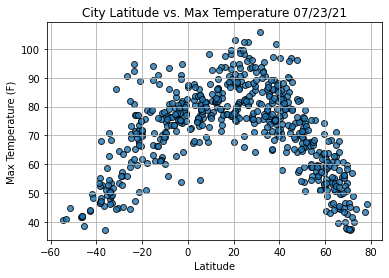

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

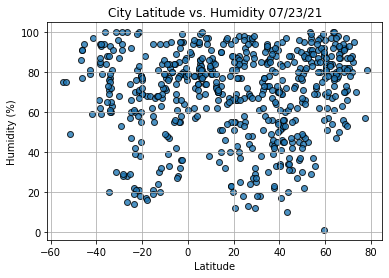

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

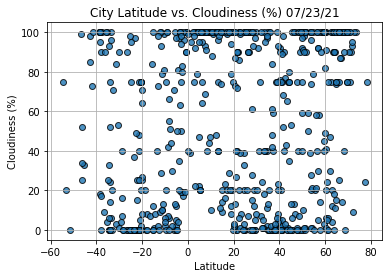

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

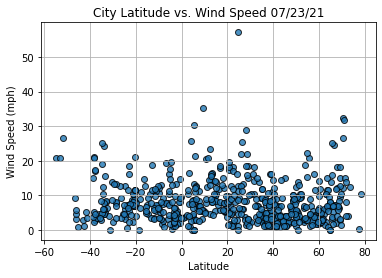

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()